# **(1) Reviews of any product from amazon**

## **Multi-page web-scraping**

In [149]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [4]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [5]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [6]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [7]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [8]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-8-2e47bb25bda7>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [9]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nCamera quality excellent,"Battery, display, camera all are best. New upd...",20 January 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nWorth for money,Performance:Awesome Product Quality:Exceeded e...,1 January 2024
3,5.0,5.0 out of 5 stars\nGood mobile with high speed.,Nice product.,21 January 2024
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nphone performance is good,,29 October 2023
96,4.0,4.0 out of 5 stars\nVery good,Product is very good,13 October 2023
97,4.0,4.0 out of 5 stars\nSoftware,Acording to price of this phone.nice camera qu...,5 November 2023
98,5.0,5.0 out of 5 stars\nBest phone in this range,Best phone in this range,1 January 2024


In [10]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

## **Import Libraries**


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import seaborn as sns

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Amazon_Reviews_Oneplus_Nord_CE2.csv to Amazon_Reviews_Oneplus_Nord_CE2 (1).csv


In [15]:
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nCamera quality excellent,"Battery, display, camera all are best. New upd...",20 January 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nWorth for money,Performance:Awesome Product Quality:Exceeded e...,1 January 2024
3,5.0,5.0 out of 5 stars\nGood mobile with high speed.,Nice product.,21 January 2024
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nphone performance is good,NaN,29 October 2023
96,4.0,4.0 out of 5 stars\nVery good,Product is very good,13 October 2023
97,4.0,4.0 out of 5 stars\nSoftware,Acording to price of this phone.nice camera qu...,5 November 2023
98,5.0,5.0 out of 5 stars\nBest phone in this range,Best phone in this range,1 January 2024


## **Data Exploration**

In [16]:
reviews.Rating.describe()

count    100.000000
mean       4.270000
std        0.565953
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

### Number of Words

In [17]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,"Battery, display, camera all are best. New upd...",11
1,The media could not be loaded.\n ...,559
2,Performance:Awesome Product Quality:Exceeded e...,87
3,Nice product.,2
4,"Ok , so this phone is good but not best in seg...",108


### Number of characters

In [18]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,"Battery, display, camera all are best. New upd...",70.0
1,The media could not be loaded.\n ...,2792.0
2,Performance:Awesome Product Quality:Exceeded e...,552.0
3,Nice product.,13.0
4,"Ok , so this phone is good but not best in seg...",604.0


### Average Word Length

In [19]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,"Battery, display, camera all are best. New upd...",5.454545
1,The media could not be loaded.\n ...,4.133581
2,Performance:Awesome Product Quality:Exceeded e...,5.356322
3,Nice product.,6.000000
4,"Ok , so this phone is good but not best in seg...",4.601852


### Number of stopwords

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,"Battery, display, camera all are best. New upd...",3
1,The media could not be loaded.\n ...,214
2,Performance:Awesome Product Quality:Exceeded e...,34
3,Nice product.,0
4,"Ok , so this phone is good but not best in seg...",42


### Number of special characters

In [21]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,"Battery, display, camera all are best. New upd...",0
1,The media could not be loaded.\n ...,0
2,Performance:Awesome Product Quality:Exceeded e...,0
3,Nice product.,0
4,"Ok , so this phone is good but not best in seg...",0


### Number of numerics

In [22]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,"Battery, display, camera all are best. New upd...",0
1,The media could not be loaded.\n ...,20
2,Performance:Awesome Product Quality:Exceeded e...,1
3,Nice product.,0
4,"Ok , so this phone is good but not best in seg...",0


### Number of Uppercase words

In [23]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,"Battery, display, camera all are best. New upd...",0
1,The media could not be loaded.\n ...,8
2,Performance:Awesome Product Quality:Exceeded e...,2
3,Nice product.,0
4,"Ok , so this phone is good but not best in seg...",0


In [24]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','hastags','upper'],axis=1,inplace=True,errors='ignore')

### Spelling correction

We’ve all seen tweets with a plethora of spelling mistakes.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we we use the textblob library.

In [25]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Battery, display, camera all are best. New upd...
1    The media could not be loaded.\n              ...
2    Performance:Awesome Product Quality:Exceeded e...
3                                        Vice product.
4    K , so this phone is good but not best in segm...
Name: Review, dtype: object

## **Feature Engineering**

In [26]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     20
1     26
2      1
3     21
4     21
      ..
95    29
96    13
97     5
98     1
99    20
Name: Review_Date, Length: 100, dtype: object 
 0       January
1      February
2       January
3       January
4     September
        ...    
95      October
96      October
97     November
98      January
99     December
Name: Review_Date, Length: 100, dtype: object 
 0     2024
1     2022
2     2024
3     2024
4     2023
      ... 
95    2023
96    2023
97    2023
98    2024
99    2023
Name: Review_Date, Length: 100, dtype: object


## Spliting Review Date into Three seperate Columns (Year,Month,Day)

In [27]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,20,January,2024
1,26,February,2022
2,1,January,2024
3,21,January,2024
4,21,September,2023
...,...,...,...
95,29,October,2023
96,13,October,2023
97,5,November,2023
98,1,January,2024


In [28]:
df.Month.value_counts()

January      53
December     25
November     12
October       7
February      2
September     1
Name: Month, dtype: int64

### Change 'month' from words to numbers for easier analysis

In [29]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,January
1,2
2,January
3,January
4,September
...,...
95,October
96,October
97,November
98,January


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       98 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    object 
 5   Month        100 non-null    object 
 6   Year         100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [31]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       98 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    int64  
 5   Month        100 non-null    object 
 6   Year         100 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ KB


### Dropping the Original Columns after splitting the data

In [32]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,5.0,5.0 out of 5 stars\nCamera quality excellent,"Battery, display, camera all are best. New upd...",20,January,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26,2,2022
2,5.0,5.0 out of 5 stars\nWorth for money,Performance:Awesome Product Quality:Exceeded e...,1,January,2024
3,5.0,5.0 out of 5 stars\nGood mobile with high speed.,Nice product.,21,January,2024
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21,September,2023


In [33]:
df

,Rating,Title,Review,Review_Date,Date,Month,Year
0,5.0,5.0 out of 5 stars\nCamera quality excellent,"Battery, display, camera all are best. New upd...",20 January 2024,20,January,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022,26,February,2022
2,5.0,5.0 out of 5 stars\nWorth for money,Performance:Awesome Product Quality:Exceeded e...,1 January 2024,1,January,2024
3,5.0,5.0 out of 5 stars\nGood mobile with high speed.,Nice product.,21 January 2024,21,January,2024
4,4.0,4.0 out of 5 stars\nOverall performance,"Ok , so this phone is good but not best in seg...",21 September 2023,21,September,2023
...,...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nphone performance is good,NaN,29 October 2023,29,October,2023
96,4.0,4.0 out of 5 stars\nVery good,Product is very good,13 October 2023,13,October,2023
97,4.0,4.0 out of 5 stars\nSoftware,Acording to price of this phone.nice camera qu...,5 November 2023,5,November,2023
98,5.0,5.0 out of 5 stars\nBest phone in this range,Best phone in this range,1 January 2024,1,January,2024


## **Data Visualization**

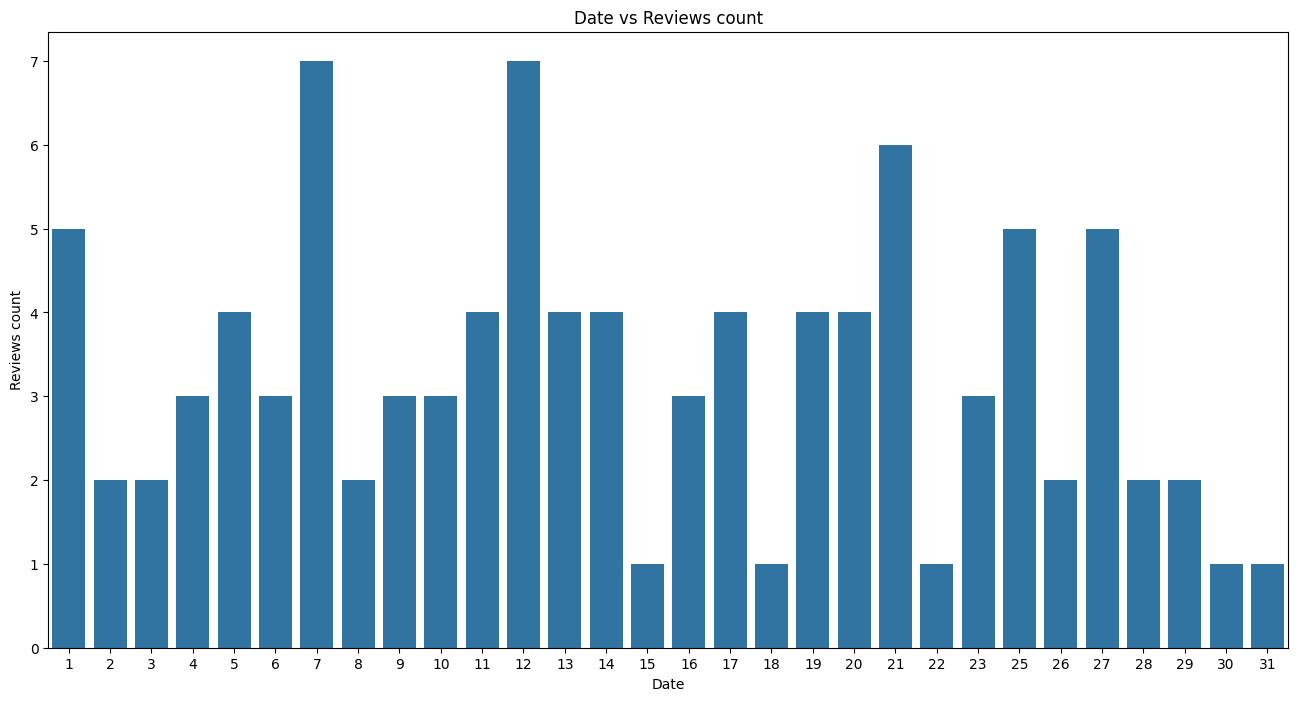

In [34]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

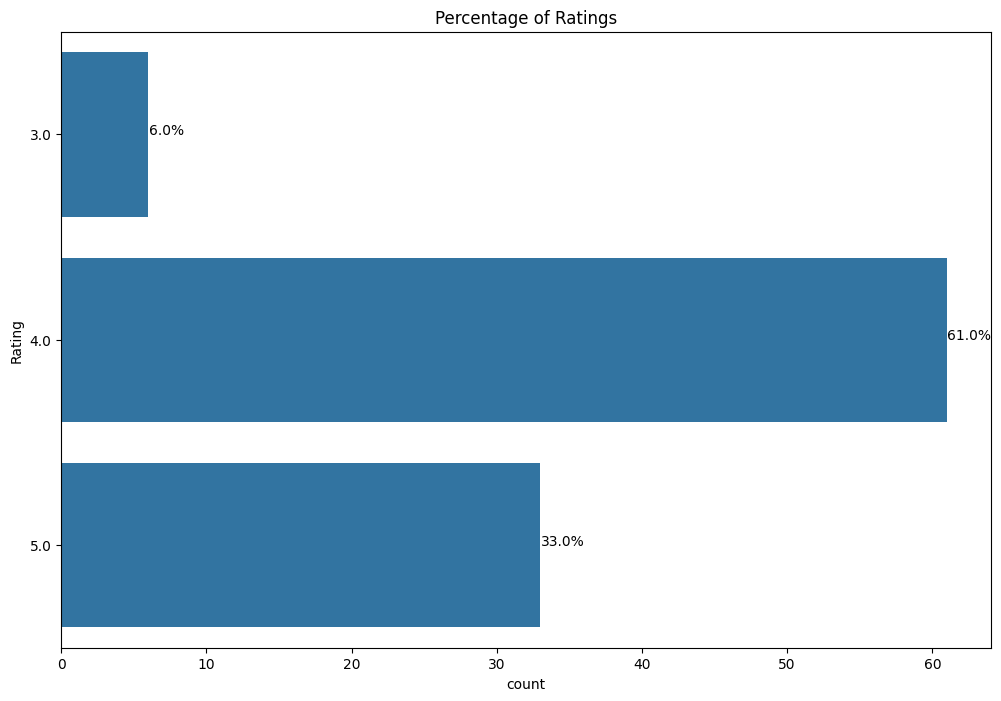

In [35]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

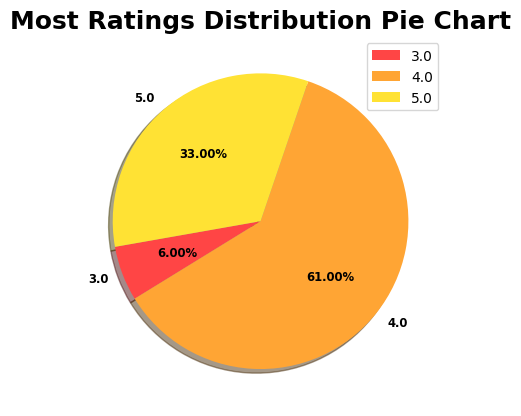

In [36]:
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = None,
       autopct= '%.2f%%',
       colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

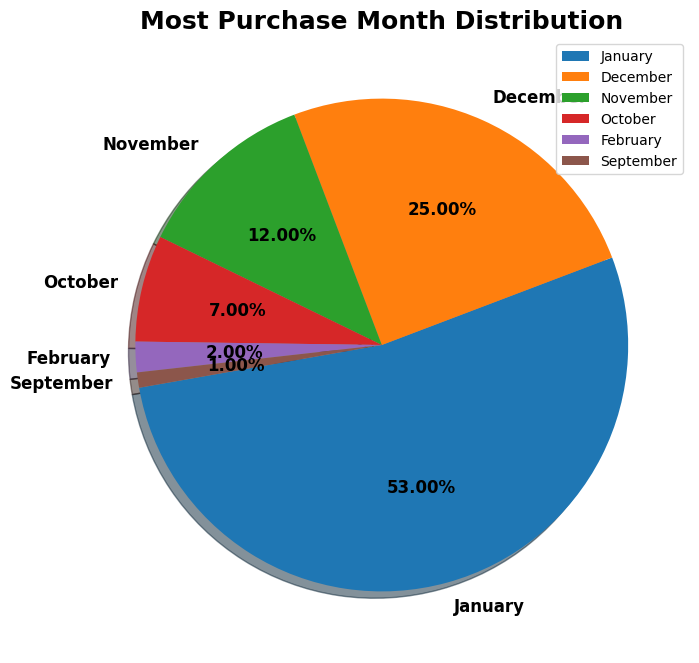

In [37]:

plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

## **BasicText Preprocessing**
## **(2)For Emotion Mining - Sentiment Analysis**

In [38]:
data = df[['Review']]
data

,Review
0,"Battery, display, camera all are best. New upd..."
1,The media could not be loaded.\n ...
2,Performance:Awesome Product Quality:Exceeded e...
3,Nice product.
4,"Ok , so this phone is good but not best in seg..."
...,...
95,NaN
96,Product is very good
97,Acording to price of this phone.nice camera qu...
98,Best phone in this range


In [39]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [40]:
data

,Review
0,"battery, display, camera best. new update quit..."
1,the media could loaded. build quality - rating...
2,performance:awesome product quality:exceeded e...
3,nice product.
4,"ok , phone good best segment, encounter minor ..."
...,...
95,nan
96,product good
97,"acording price phone.nice camera quality, colo..."
98,best phone range


In [41]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [42]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()


,Clean_Reviews,Uncleaned_Reviews
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
3,nice product,Nice product.
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."


### **Text Pre-processing Techniques**

###  Removing '@names'

In [43]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [44]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
3,nice product,Nice product.
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice comfortable using phone since year,Very nice and comfortable I am using this phon...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,best phone cost,Best phone in cost
9,nice phone,Nice phone


### Removing links (http | https)

In [45]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
3,nice product,Nice product.
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice comfortable using phone since year,Very nice and comfortable I am using this phon...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,best phone cost,Best phone in cost
9,nice phone,Nice phone


### Removing Review with empty text

In [46]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
3,nice product,Nice product.
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice comfortable using phone since year,Very nice and comfortable I am using this phon...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,best phone cost,Best phone in cost
9,nice phone,Nice phone


### Dropping duplicate rows

In [47]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
3,nice product,Nice product.
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice comfortable using phone since year,Very nice and comfortable I am using this phon...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,best phone cost,Best phone in cost
9,nice phone,Nice phone


### Resetting index

In [49]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
3,nice product,Nice product.
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice comfortable using phone since year,Very nice and comfortable I am using this phon...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,best phone cost,Best phone in cost
9,nice phone,Nice phone


### Removing Punctuations, Numbers and Special characters

In [50]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [51]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
3,nice product,Nice product.
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice comfortable using phone since year,Very nice and comfortable I am using this phon...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,best phone cost,Best phone in cost
9,nice phone,Nice phone


### Function to remove emoji

In [52]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [53]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...
3,nice product,Nice product.
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg..."
5,nice comfortable using phone since year,Very nice and comfortable I am using this phon...
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...
8,best phone cost,Best phone in cost
9,nice phone,Nice phone


In [54]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd...","[battery, display, camera, best, new, update, ..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...,"[performance, awesome, product, quality, excee..."
3,nice product,Nice product.,"[nice, product]"
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...","[ok, phone, good, best, segment, encounter, mi..."
5,nice comfortable using phone since year,Very nice and comfortable I am using this phon...,"[nice, comfortable, using, phone, since, year]"
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ...","[oneplus, nord, ce, g, bahamas, blue, gb, ram,..."
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,"[good, stylish, phone, compared, phone, functi..."
8,best phone cost,Best phone in cost,"[best, phone, cost]"
9,nice phone,Nice phone,"[nice, phone]"


In [55]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

### Removing Stop words

In [107]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd...",0.518182,0.245455,pos
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,0.512212,0.213783,pos
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...,0.648750,0.351250,pos
3,nice product,Nice product.,1.000000,0.600000,pos
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...",0.491837,0.362245,pos
5,nice comfortable using phone since year,Very nice and comfortable I am using this phon...,0.900000,0.500000,pos
6,oneplus nord ce g bahamas blue gb ram gb stora...,"""OnePlus Nord CE 2 5G (Bahamas Blue, 8GB RAM, ...",0.366667,-0.200000,neg
7,good stylish phone compared phone function lik...,Very good and Stylish phone as compared to oth...,0.534375,0.292187,pos
8,best phone cost,Best phone in cost,0.300000,1.000000,pos
9,nice phone,Nice phone,1.000000,0.600000,pos


### Tokenize 'Clean_Reviews'

In [60]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'build', 'quality', 'rating', 'one', 'light', 'weight', 'phone', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'matter', 'back', 'cover', 'term', 'styling', 'similar', 'oppo', 'phone', 'liked', 'recommend', 'gray', 'one', 'attache', 'fingerprint', 'going', 'use', 'back', 'cover', 'matterdisplay', 'rating', 'really', 'good', 'amoled', 'plan', 'hz', 'refresh', 'rate', 'work', 'well', 'wish', 'could', 'hz', 'bottom', 'chin', 'quite', 'thick', 'thing', 'yes', 'gorilla', 'glass', 'protection', 'screen', 'guard', 'pre', 'applied', 'panel', 'one', 'best', 'pretty', 'decent', 'wellperformance', 'rating', 'dimensity', 'ufs', 'lppdr', 'x', 'ram', 'get', 'job', 'done', 'regular', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'pretty', 'good', 'expect', 'fps', 'stable', 'bgmi', 'cod', 'still', 'would', 'say', 'processor', 'good', 'competition', 'offering', 

In [61]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [battery, display, camera, best, new, update, ...
1    [medium, could, loaded, build, quality, rating...
2    [performance, awesome, product, quality, excee...
3                                      [nice, product]
4    [ok, phone, good, best, segment, encounter, mi...
5       [nice, comfortable, using, phone, since, year]
6    [oneplus, nord, ce, g, bahamas, blue, gb, ram,...
7    [good, stylish, phone, compared, phone, functi...
8                                  [best, phone, cost]
9                                        [nice, phone]
Name: Clean_Reviews, dtype: object

### Converting words to Stemmer

In [62]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [63]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,batteri display camera best new updat quit irrit
1,medium could load build qualiti rate one light...
2,perform awesom product qualiti exceed expect b...
3,nice product
4,ok phone good best segment encount minor bug l...
...,...
92,nan
93,product good
94,acord price phone nice camera qualiti colour d...
95,best phone rang


### Converting words to Lemma

In [64]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,battery display camera best new update quite i...
1,medium could loaded build quality rating one l...
2,performance awesome product quality exceeded e...
3,nice product
4,ok phone good best segment encounter minor bug...
...,...
92,nan
93,product good
94,acording price phone nice camera quality colou...
95,best phone range


### **Basic Feature Extaction**

### Applying bag of Words without N gram

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [66]:
#print(cv.vocabulary_)#print(cv.vocabulary_)

In [67]:
print(cv.get_feature_names_out()[109:200])

['comparatively' 'compared' 'compass' 'competition' 'complain'
 'complained' 'complaining' 'con' 'conclude' 'condition' 'connectivity'
 'connects' 'considering' 'consumes' 'cost' 'could' 'country' 'cover'
 'crash' 'crashing' 'customer' 'damaged' 'dark' 'day' 'decent' 'decide'
 'definitely' 'degree' 'delete' 'delivered' 'delivery' 'design' 'device'
 'dimensity' 'disabled' 'disappointing' 'display' 'done' 'donno' 'doubt'
 'drain' 'drop' 'due' 'dum' 'durability' 'early' 'easily' 'easy' 'edge'
 'edit' 'ek' 'emi' 'encounter' 'end' 'enough' 'equal' 'even' 'ever'
 'everage' 'everything' 'exceeded' 'excellent' 'exchange' 'excluding'
 'expandable' 'expect' 'expectation' 'expected' 'expecting' 'experience'
 'exposure' 'facebook' 'facing' 'fact' 'falling' 'famous' 'far' 'fast'
 'fastspeakers' 'father' 'fav' 'feature' 'featured' 'feb' 'feel'
 'festival' 'file' 'filter' 'final' 'find' 'fine']


In [68]:
print(cv.get_feature_names_out()[:100])

['aa' 'aap' 'aati' 'able' 'acha' 'achcha' 'achchi' 'achievable' 'achieve'
 'acording' 'ad' 'adapter' 'adjust' 'afterwards' 'almost' 'also'
 'although' 'always' 'amazing' 'amazon' 'amoled' 'android' 'angle'
 'anyone' 'anyways' 'apne' 'app' 'applied' 'approximately' 'apps' 'around'
 'asked' 'atleast' 'attache' 'aur' 'average' 'avoided' 'awesome' 'ba'
 'back' 'background' 'backup' 'bad' 'bahamas' 'baki' 'band' 'based'
 'basic' 'battery' 'baught' 'bdiya' 'becomes' 'believe' 'best'
 'bestbattery' 'better' 'bezel' 'bgmi' 'bhi' 'bhut' 'biggest' 'bit'
 'bloat' 'bloatwares' 'blue' 'blurred' 'body' 'bottom' 'bought' 'brand'
 'brightness' 'browse' 'budget' 'bug' 'buggier' 'build' 'built' 'busy'
 'buy' 'cam' 'camera' 'canera' 'care' 'case' 'ce' 'chala' 'chalana'
 'change' 'changing' 'charge' 'charger' 'charging' 'chat' 'cheap' 'check'
 'chin' 'choice' 'chuka' 'class' 'clean']


In [69]:
print(tweetscv.toarray()[100:200])

[]


### CountVectorizer with N-grams (Bigrams & Trigrams)

In [70]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/97 [00:00<?, ?it/s]

In [71]:
corpus[3]

'nice product'

In [72]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X.shape

(97, 3204)

In [73]:
cv.get_feature_names_out()[:20]

array(['aa', 'aa gya', 'aa gya tha', 'aap', 'aap set', 'aap set chang',
       'aati', 'aati jati', 'aati jati rhti', 'abl', 'abl buy',
       'abl buy phone', 'acha', 'acha comfort', 'acha comfort bhi',
       'acha hai', 'acha hai lekin', 'acha hai mene', 'acha tha',
       'acha tha lekin'], dtype=object)

In [74]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [75]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,aa,aa gya,aa gya tha,aap,aap set,aap set chang,aati,aati jati,aati jati rhti,abl,...,year last,year last easili,youtub,youtub instagram,youtub instagram facebook,youtub video,youtub video test,yt,yt heat,yt heat issu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorizer

In [76]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/97 [00:00<?, ?it/s]

In [77]:
corpus[4]

'ok phone good best segment encount minor bug like app crash idk happen perform quit good lag frame drop game like bgmi camera camera quit good make photo colour oversatur ultra wide len selfi camera good final review go get k keep mind display good get p yt heat issu batteri perform also good budget tight look brand valu go edit app crash problem fix updat'

In [78]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [79]:
X.shape

(97, 3204)

In [80]:
tfidf_v.get_feature_names_out()[:20]

array(['aa', 'aa gya', 'aa gya tha', 'aap', 'aap set', 'aap set chang',
       'aati', 'aati jati', 'aati jati rhti', 'abl', 'abl buy',
       'abl buy phone', 'acha', 'acha comfort', 'acha comfort bhi',
       'acha hai', 'acha hai lekin', 'acha hai mene', 'acha tha',
       'acha tha lekin'], dtype=object)

In [81]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [82]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,aa,aa gya,aa gya tha,aap,aap set,aap set chang,aati,aati jati,aati jati rhti,abl,...,year last,year last easili,youtub,youtub instagram,youtub instagram facebook,youtub video,youtub video test,yt,yt heat,yt heat issu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.03281,0.03281,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.073584,0.073584,0.073584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


### Named Entity Recognition (NER)

In [83]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'battery display camera best new update quite irritating medium could loaded build quality rating one light weight phone say quite comfortable one hand usage even material used polycarbonate get job done matter back cover term styling similar oppo phone liked recommend gray one attache fingerprint going use back cover matterdisplay rating really good amoled plan hz refresh rate work well wish could hz bottom chin quite thick thing yes gorilla glass protection screen guard pre applied panel one best pretty decent wellperformance rating dimensity ufs lppdr x ram get job done regular day day operation played game say considering soc pretty good expect fps stable bgmi cod still would say processor good competition offering better decide gaming matter next year last easily normal usagesoftware biggest con android based oxygen say future color oos overall quite stable bug still say lot wait android better ideacamera rating mp decent atleast expecting samsung sensor though provided omnivison 

In [84]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [85]:
for token in doc_block[:50]:
    print(token,token.pos_)

battery NOUN
display NOUN
camera NOUN
best ADJ
new ADJ
update NOUN
quite ADV
irritating VERB
medium NOUN
could AUX
loaded VERB
build VERB
quality NOUN
rating NOUN
one NUM
light ADJ
weight NOUN
phone NOUN
say VERB
quite ADV
comfortable ADJ
one NUM
hand NOUN
usage NOUN
even ADV
material NOUN
used VERB
polycarbonate NOUN
get NOUN
job NOUN
done VERB
matter NOUN
back ADV
cover NOUN
term NOUN
styling VERB
similar ADJ
oppo NOUN
phone NOUN
liked VERB
recommend VERB
gray ADJ
one NUM
attache NOUN
fingerprint PROPN
going VERB
use NOUN
back ADV
cover NOUN
matterdisplay NOUN


In [86]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['ultratwide', 'camera', 'saying', 'others', 'offering', 'oneplus', 'managed', 'give', 'thingsbattery', 'rating', 'rate', 'percent', 'brightness', 'mode', 'excluding', 'gaming', 'give', 'hr', 'wifi', 'rest', 'remaining', 'wifi', 'battery', 'task', 'day', 'charging', 'take', 'minute', 'charge', 'percent', 'fastspeakers', 'speaker', 'quality', 'quality', 'rating', 'none', 'party', 'complained', 'voice', 'getting', 'conclude', 'buy', 'care', 'oneplus', 'want', 'try', 'oneplus', 'time', 'getting', 'price', 'rejected', 'miui', 'user', 'want', 'software', 'ad', 'notification', 'bloatwares', 'performance', 'product', 'quality', 'exceeded', 'expectation', 'feature', 'processor', 'battery', 'bought', 'friend', 'fone', 'damaged', 'test', 'week', 'range', 'phone', 'exceeded', 'expectation', 'get', 'charging', 'gaming', 'battery', 'life', 'lasted', 'day', 'phone', 'connects', 'lag', 'multitasking', 'oneplus', 'performance', 'buy', 'time', 'opt', 'end', 'flagship', 'model', 'product', 'phone', 'seg

In [87]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,52
1,camera,29
2,battery,18
3,quality,18
4,performance,14
5,oneplus,13
6,price,12
7,product,12
8,buy,11
9,use,10


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

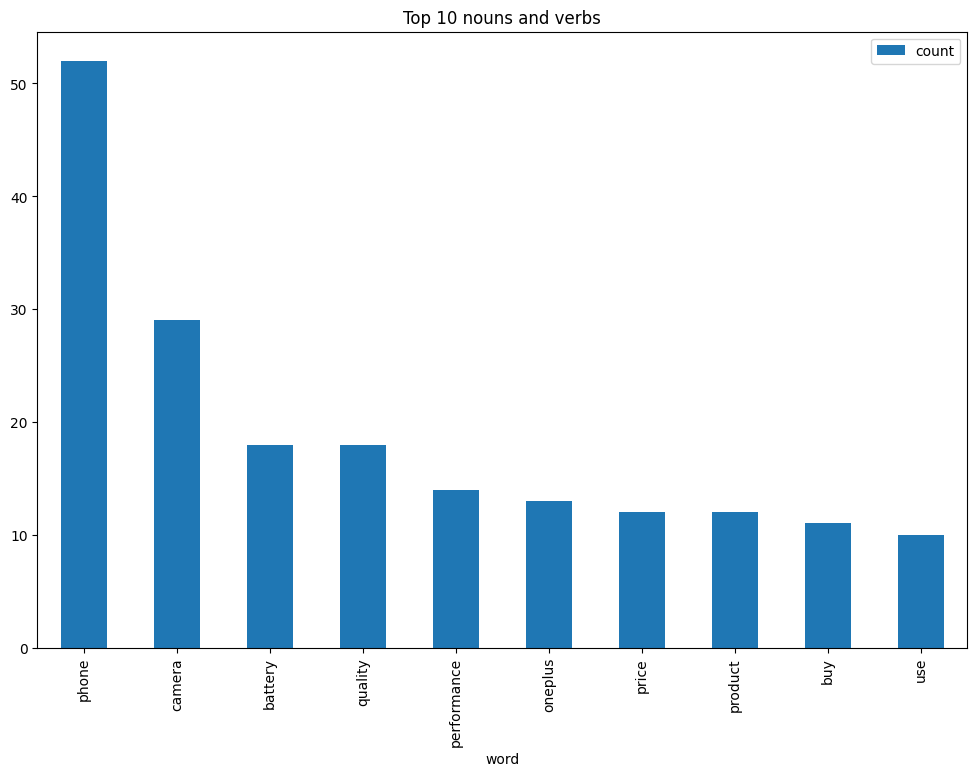

In [88]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

## **Feature Extraction**

## Feature Extraction for 'Key Words'

In [89]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

### **Emotion Mining**
### Fetch sentiments

In [90]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### a.Using NLTK's SentimentIntensityAnalyzer

In [123]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,95
neg,2


In [124]:
dataframe.Clean_Reviews[8]

'best phone cost'

In [125]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [127]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,battery display camera best new update quite i...,"{'neg': 0.244, 'neu': 0.445, 'pos': 0.311, 'co..."
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co..."
2,performance awesome product quality exceeded e...,"{'neg': 0.082, 'neu': 0.683, 'pos': 0.234, 'co..."
3,nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
4,ok phone good best segment encounter minor bug...,"{'neg': 0.128, 'neu': 0.529, 'pos': 0.344, 'co..."


In [128]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,battery display camera best new update quite i...,"{'neg': 0.244, 'neu': 0.445, 'pos': 0.311, 'co...",0.2280
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977
2,performance awesome product quality exceeded e...,"{'neg': 0.082, 'neu': 0.683, 'pos': 0.234, 'co...",0.8687
3,nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215
4,ok phone good best segment encounter minor bug...,"{'neg': 0.128, 'neu': 0.529, 'pos': 0.344, 'co...",0.9619


In [129]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,battery display camera best new update quite i...,"{'neg': 0.244, 'neu': 0.445, 'pos': 0.311, 'co...",0.2280,Positive
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977,Positive
2,performance awesome product quality exceeded e...,"{'neg': 0.082, 'neu': 0.683, 'pos': 0.234, 'co...",0.8687,Positive
3,nice product,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive
4,ok phone good best segment encounter minor bug...,"{'neg': 0.128, 'neu': 0.529, 'pos': 0.344, 'co...",0.9619,Positive
...,...,...,...,...
92,nan,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
93,product good,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
94,acording price phone nice camera quality colou...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.4215,Positive
95,best phone range,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.6369,Positive


In [130]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

In [140]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

,sentiment,Review
2,Positive,85
1,Neutral,10
0,Negative,2


<Axes: xlabel='sentiment', ylabel='count'>

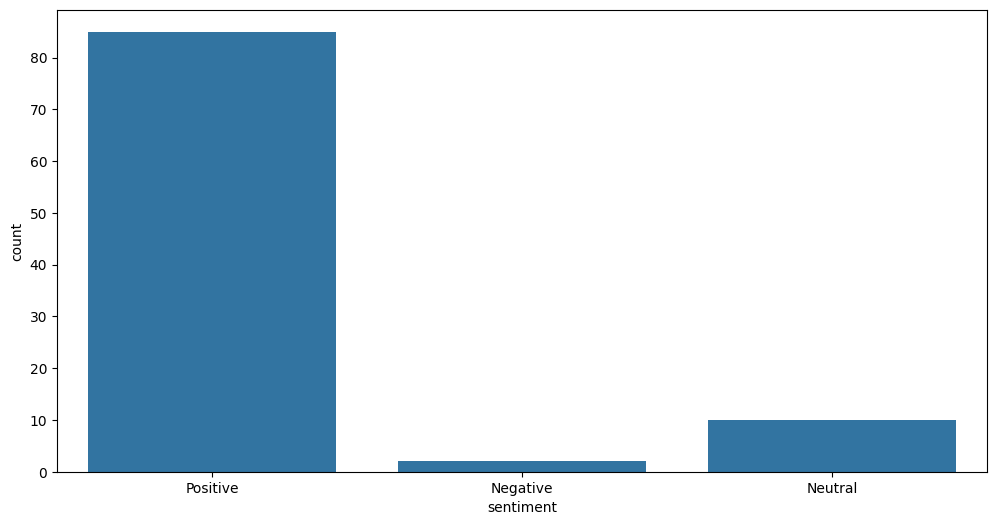

In [132]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<Axes: xlabel='compound', ylabel='Density'>

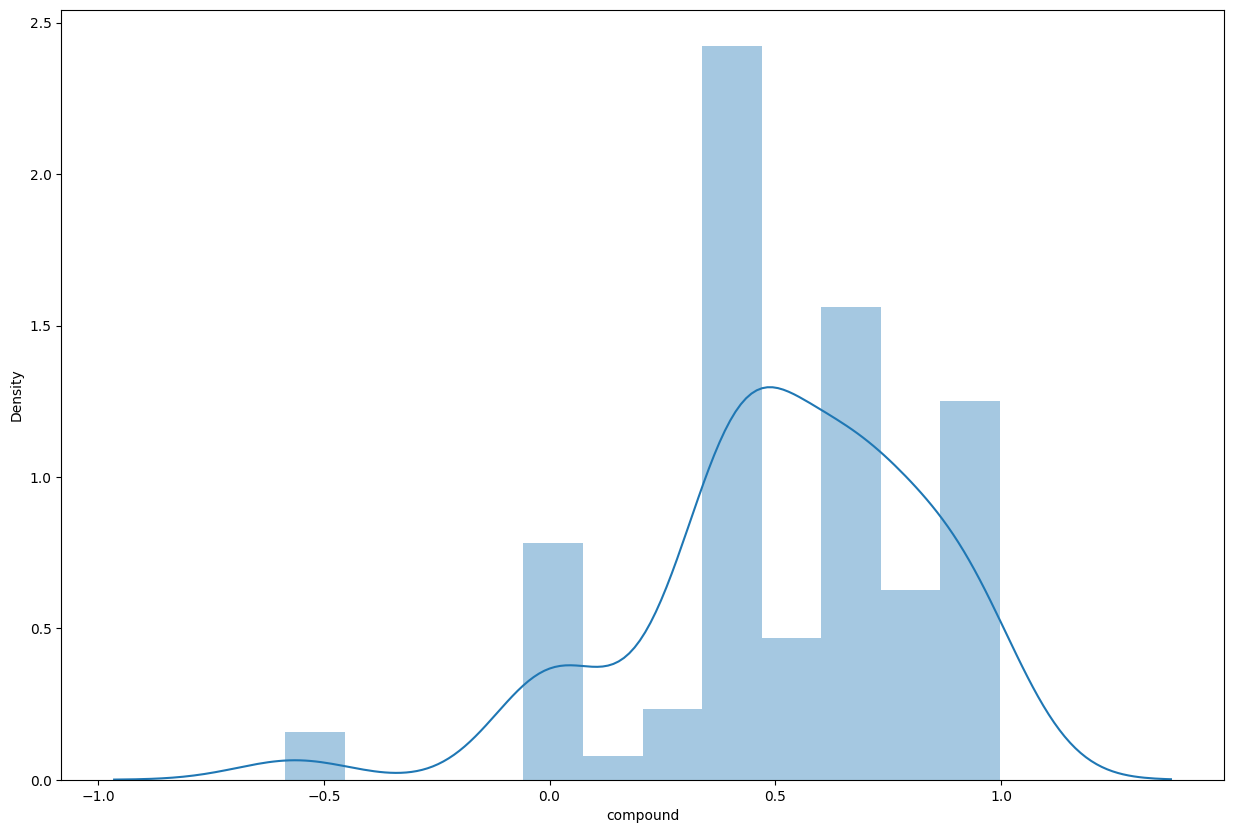

In [133]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [141]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,battery display camera best new update quite i...,8
1,medium could loaded build quality rating one l...,259
2,performance awesome product quality exceeded e...,51
3,nice product,2
4,ok phone good best segment encounter minor bug...,66


## b.Using TextBlob

In [108]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,93
neg,4


In [96]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()


,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd...",0.518182,0.245455
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,0.512212,0.213783
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...,0.648750,0.351250
3,nice product,Nice product.,1.000000,0.600000
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...",0.491837,0.362245


Text(0, 0.5, 'Subjectivity')

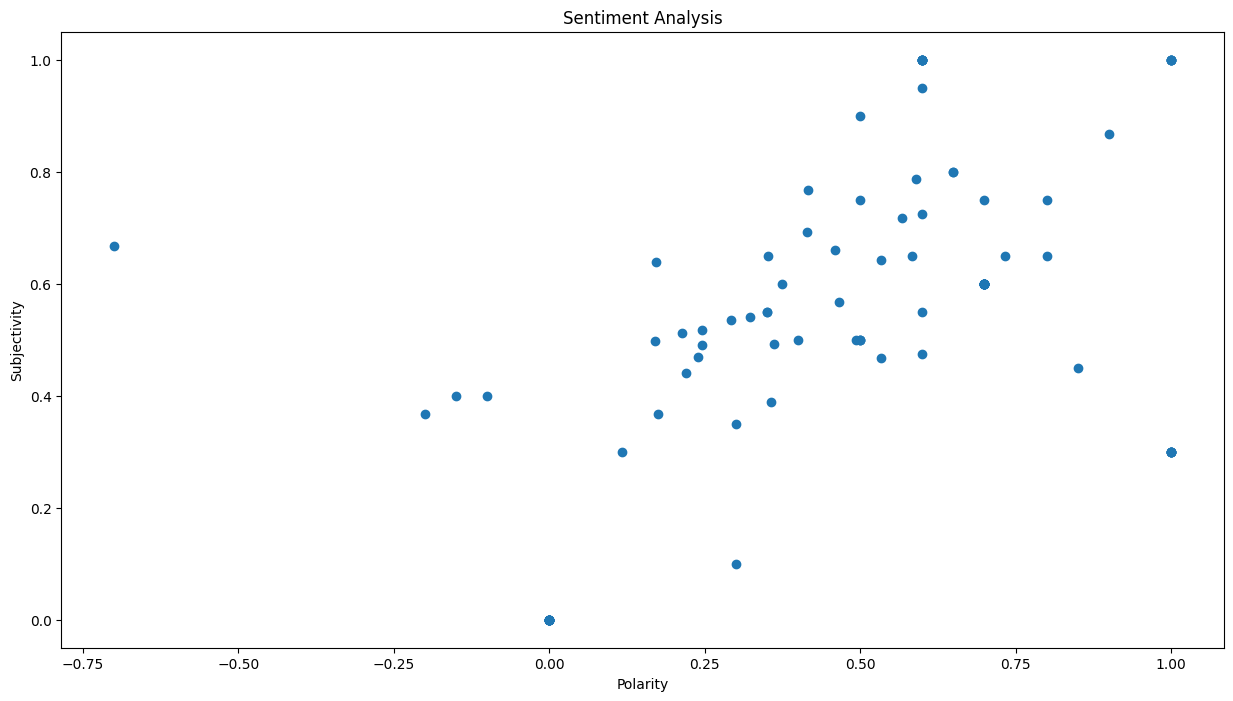

In [97]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [144]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

NLTK gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

In [146]:
from google.colab import files
uploaded = files.upload()

Saving clean_data.csv to clean_data.csv


In [147]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_data.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,battery display camera best new update quite i...,"Battery, display, camera all are best. New upd...",0.518182,0.245455,pos
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,0.512212,0.213783,pos
2,performance awesome product quality exceeded e...,Performance:Awesome Product Quality:Exceeded e...,0.648750,0.351250,pos
3,nice product,Nice product.,1.000000,0.600000,pos
4,ok phone good best segment encounter minor bug...,"Ok , so this phone is good but not best in seg...",0.491837,0.362245,pos


### **Story Generation and Visualization**

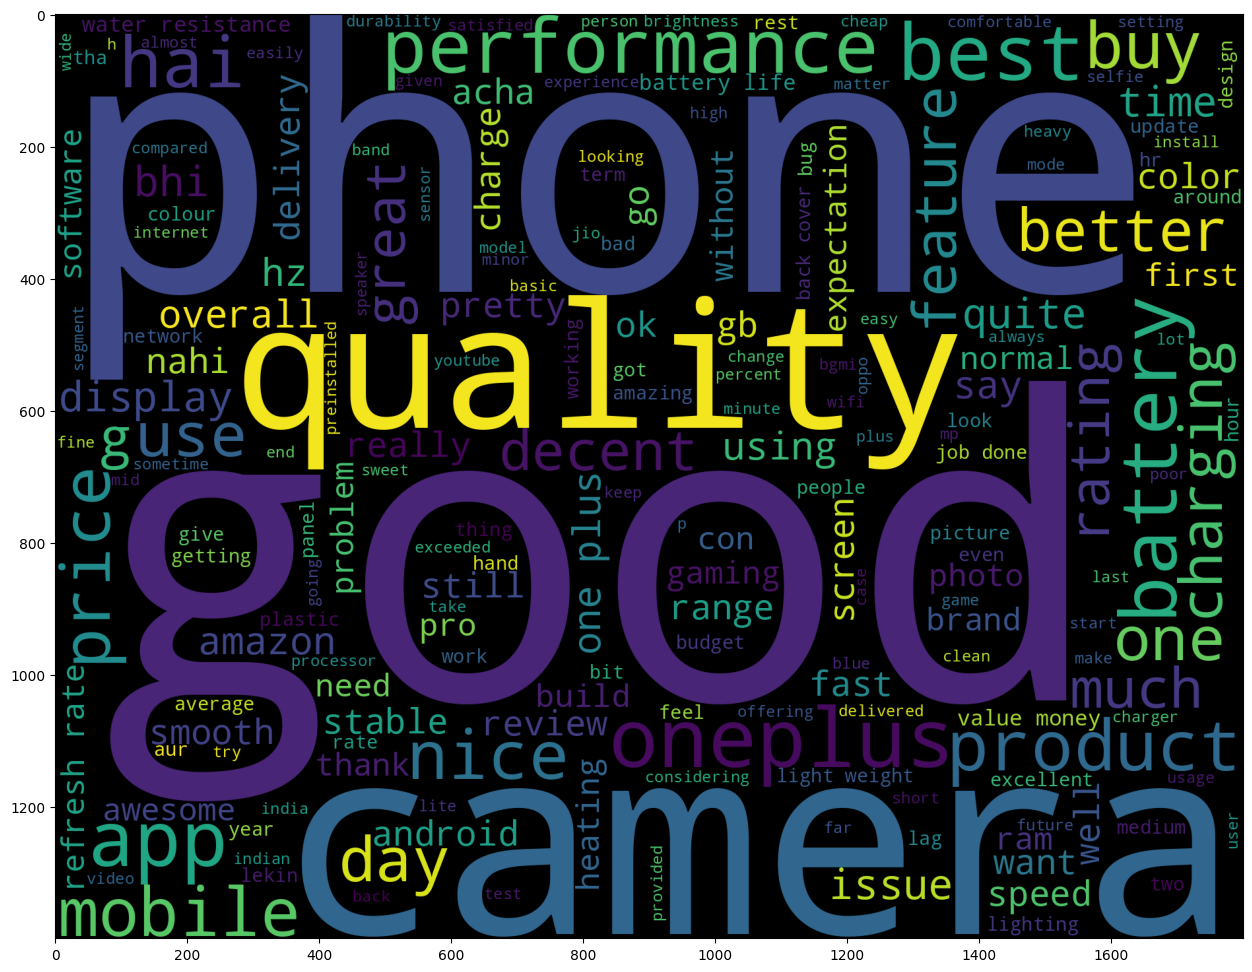

In [100]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

### **Most common words in positive Review**

In [101]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

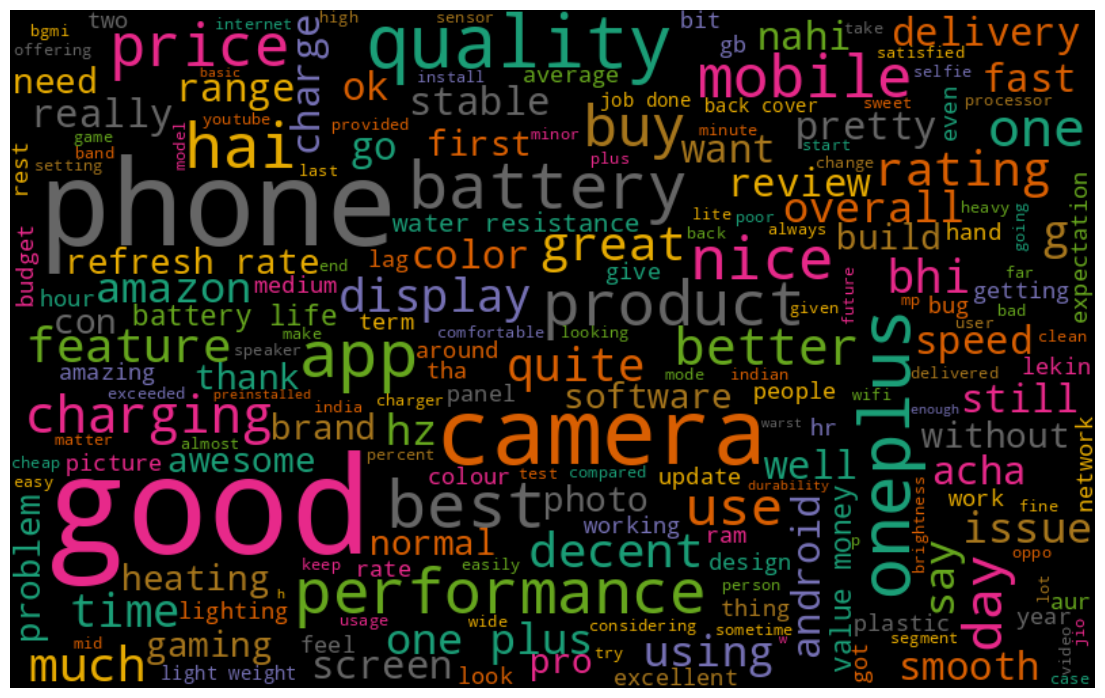

In [102]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### **Most common words in negative Review**

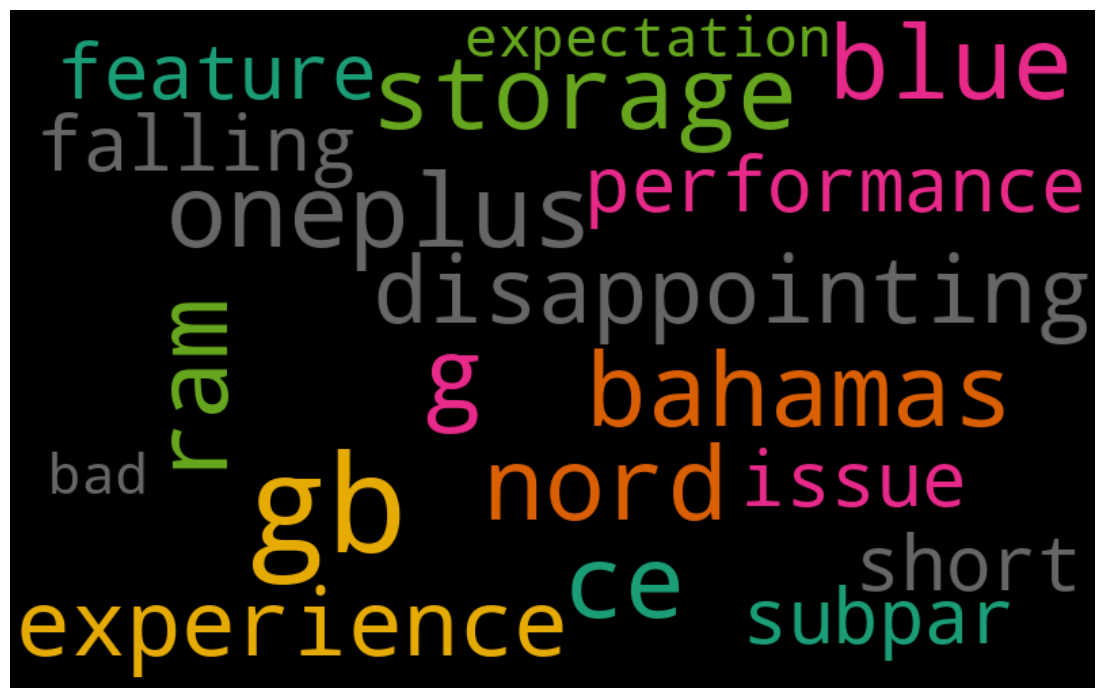

In [103]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)